In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [11]:
# Load the dataset
automobile_df = pd.read_csv('Indian automoble buying behavour study 1.0.csv')

In [12]:
# Display the first few rows of the dataset
automobile_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [13]:
# Load the dataset
ev_df = pd.read_csv('indian-ev-data.csv')

In [14]:
# Display the first few rows of the dataset
ev_df.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


In [17]:
# Summary statistics for Automobile Buying Behavior dataset
automobile_df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [18]:
# Summary statistics for EV Data dataset
ev_df.describe()

,id,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.00000,50.000000,50.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.50000,3.188000,120.160000,3.755102,120469.387755,6.795918,73.775510,2021.204082
std,14.57738,0.950325,30.370743,0.947158,46317.789078,6.570070,13.288882,0.499149
min,1.00000,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,13.25000,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,25.50000,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,37.75000,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,50.00000,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


In [19]:
# Missing values in Automobile Buying Behavior dataset
automobile_df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [20]:
# Missing values in EV Data dataset
ev_df.isnull().sum()

id                        0
Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             1
Price                     1
Power (HP or kW)          1
Top Speed (km/h)          1
Year of Manufacture       1
dtype: int64

In [26]:
# Data types and unique values in Automobile Buying Behavior dataset
automobile_df.dtypes
automobile_df.nunique()

Age                 22
Profession           2
Marrital Status      2
Education            2
No of Dependents     4
Personal loan        2
House Loan           2
Wife Working         3
Salary              24
Wife Salary         14
Total Salary        36
Make                 9
Price               10
dtype: int64

In [25]:
#Data types and unique values in EV Data dataset
ev_df.dtypes
ev_df.nunique()

id                        50
Model                     21
Manufacturer              10
Vehicle Type               2
Battery Capacity (kWh)    11
Range per Charge (km)     14
Charging Time              8
Price                     18
Power (HP or kW)           9
Top Speed (km/h)           8
Year of Manufacture        3
dtype: int64

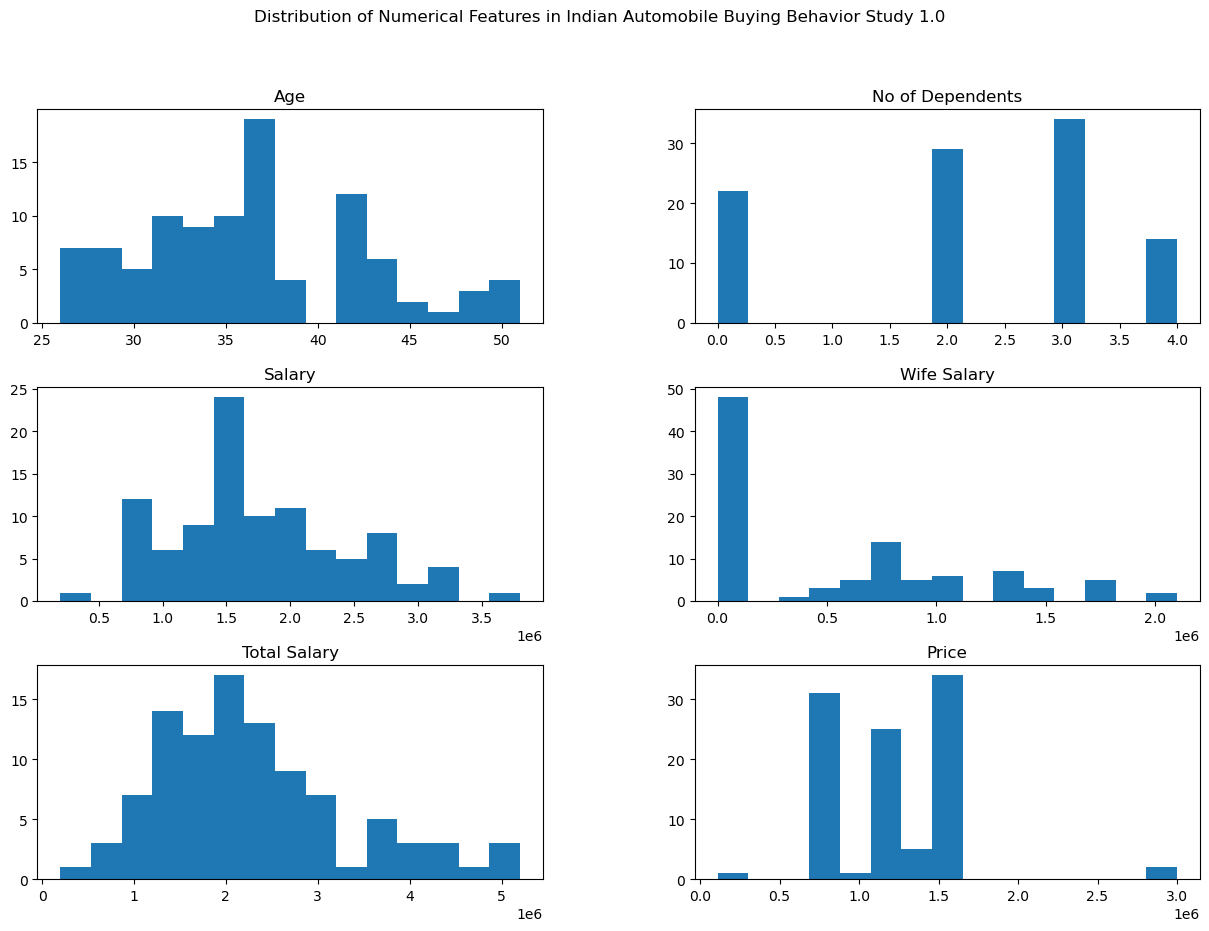

In [27]:
# Visualize distribution of numerical features in Automobile Buying Behavior dataset
automobile_df.hist(bins=15, figsize=(15, 10), grid=False)
plt.suptitle("Distribution of Numerical Features in Indian Automobile Buying Behavior Study 1.0")
plt.show()


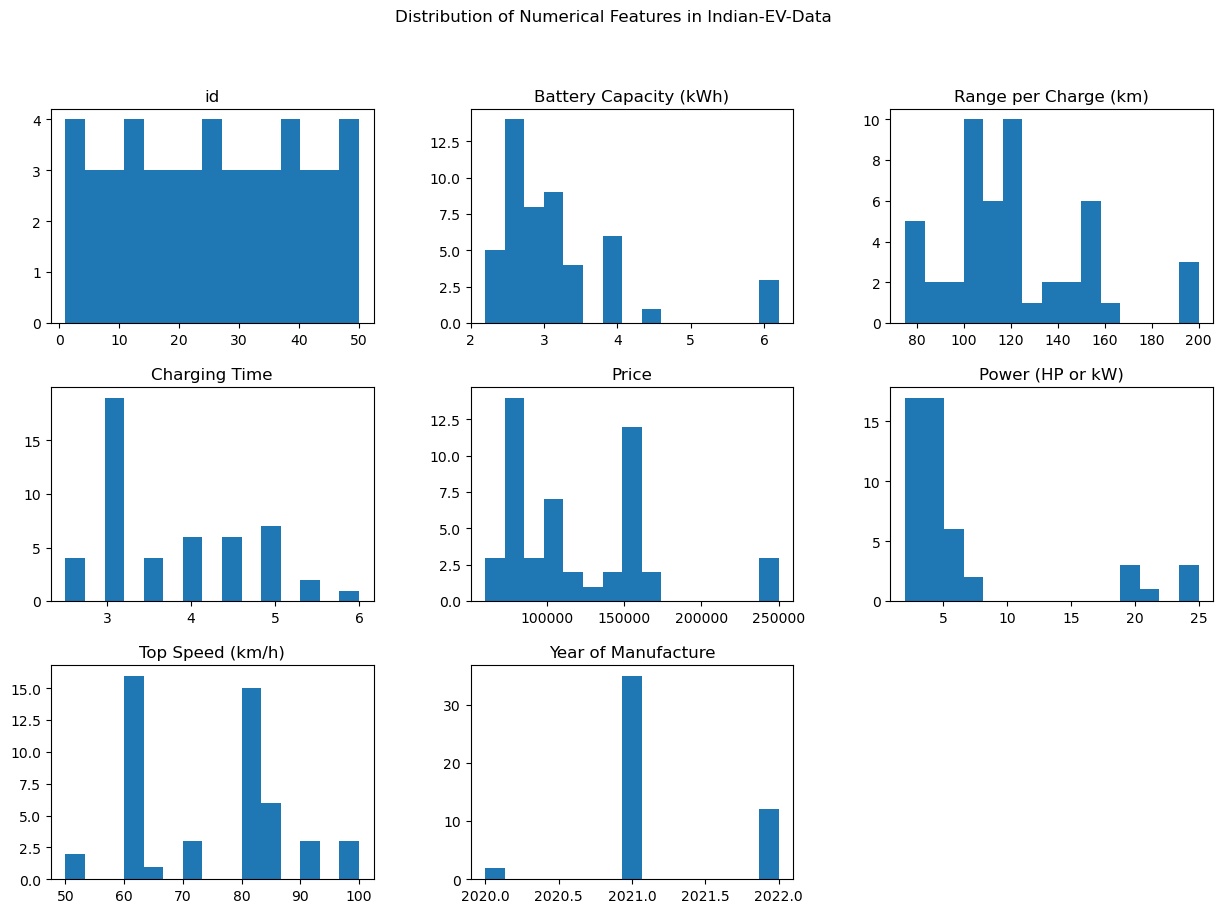

In [28]:
# Visualize distribution of numerical features in EV Data dataset
ev_df.hist(bins=15, figsize=(15, 10), grid=False)
plt.suptitle("Distribution of Numerical Features in Indian-EV-Data")
plt.show()

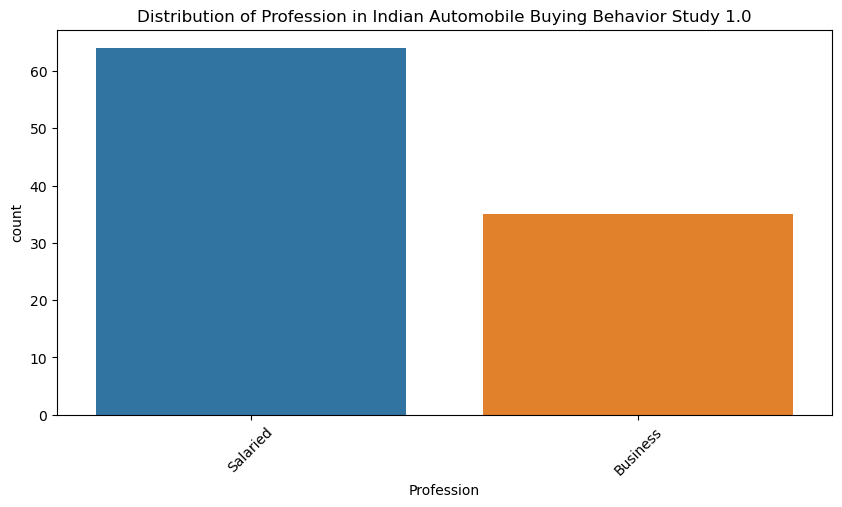

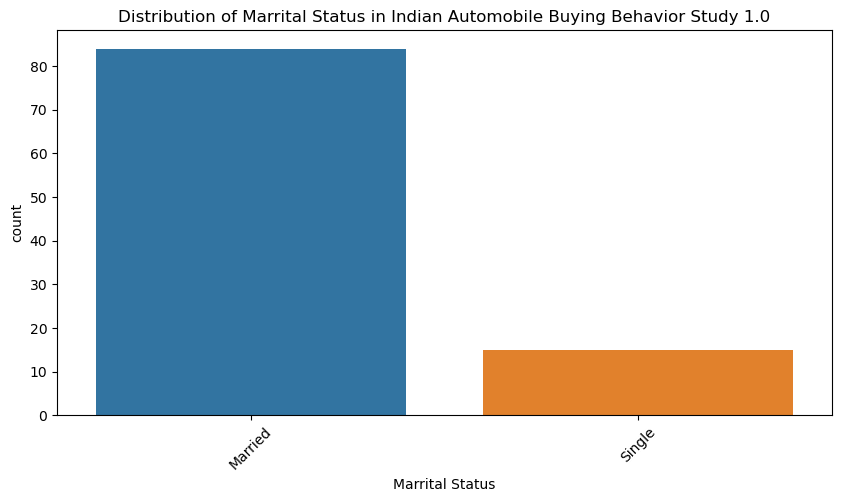

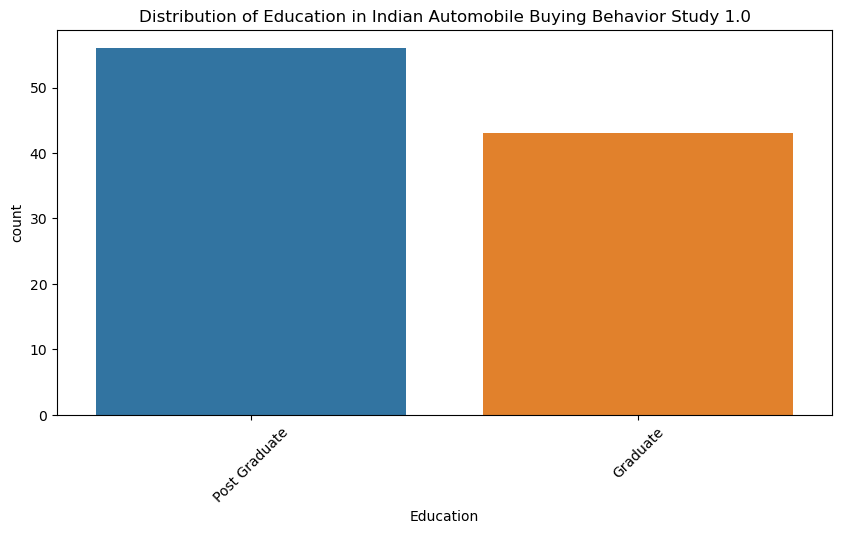

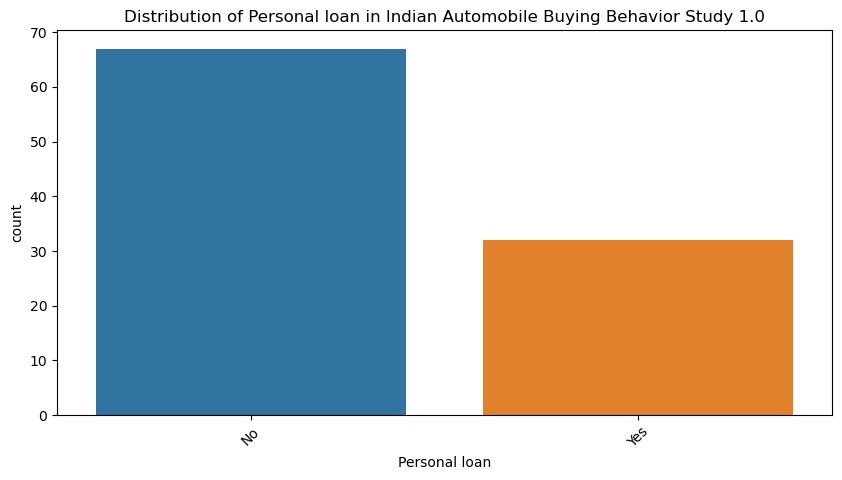

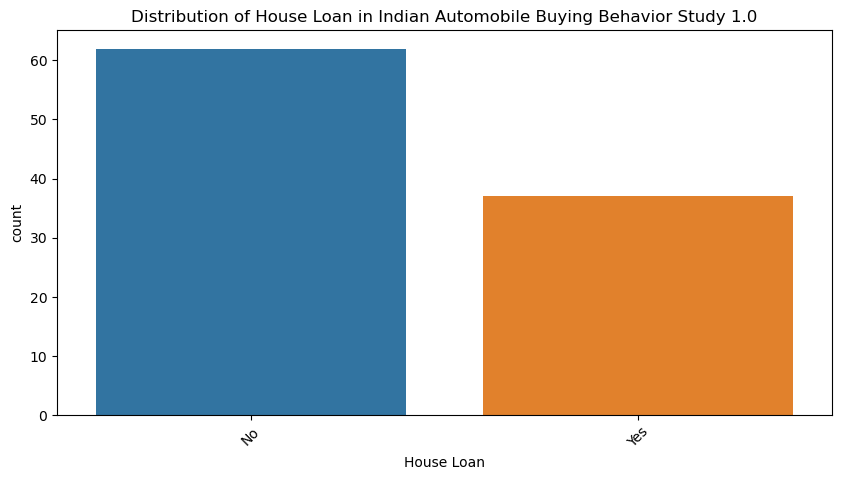

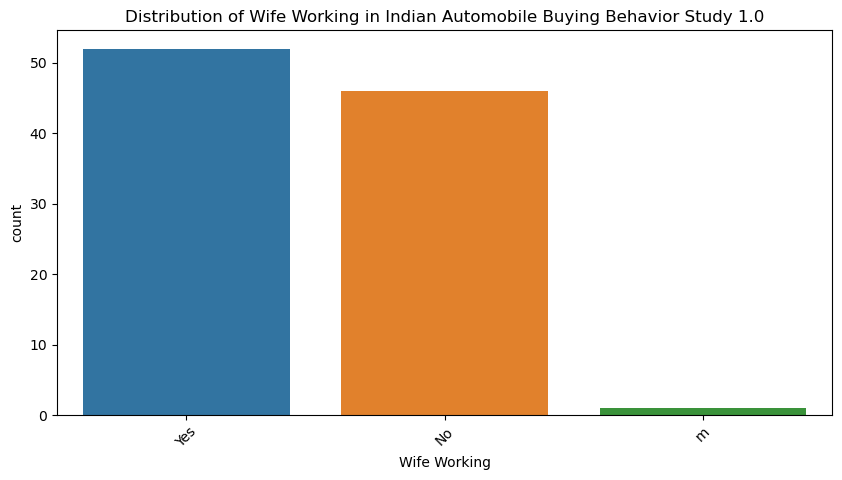

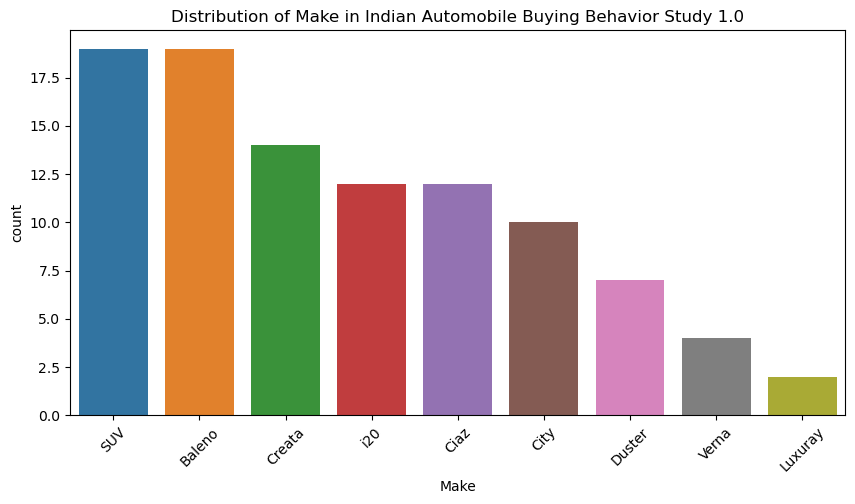

In [29]:
# Categorical features in Automobile Buying Behavior dataset
categorical_cols_auto = automobile_df.select_dtypes(include=['object']).columns

for col in categorical_cols_auto:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=automobile_df, x=col, order=automobile_df[col].value_counts().index)
    plt.title(f"Distribution of {col} in Indian Automobile Buying Behavior Study 1.0")
    plt.xticks(rotation=45)
    plt.show()



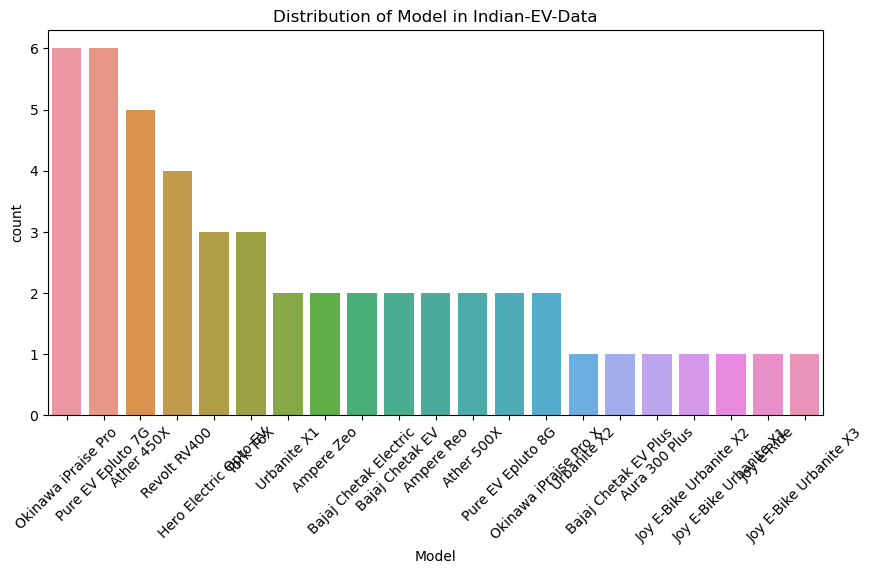

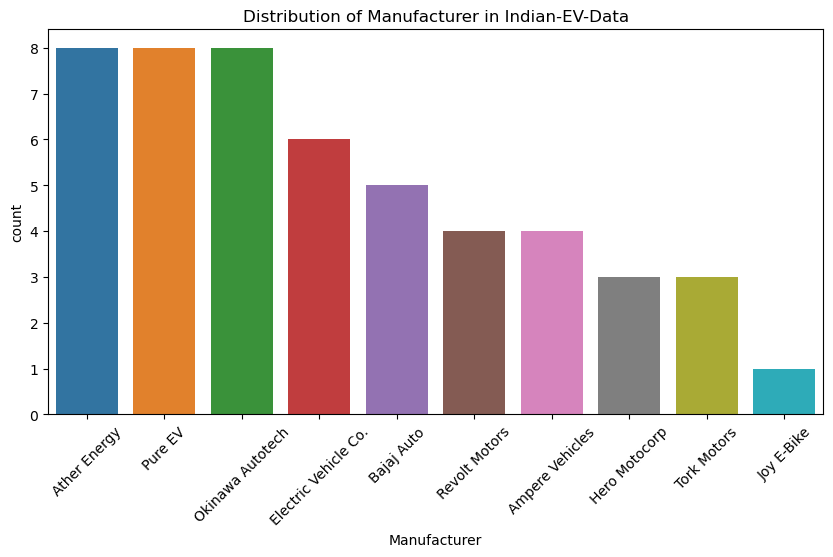

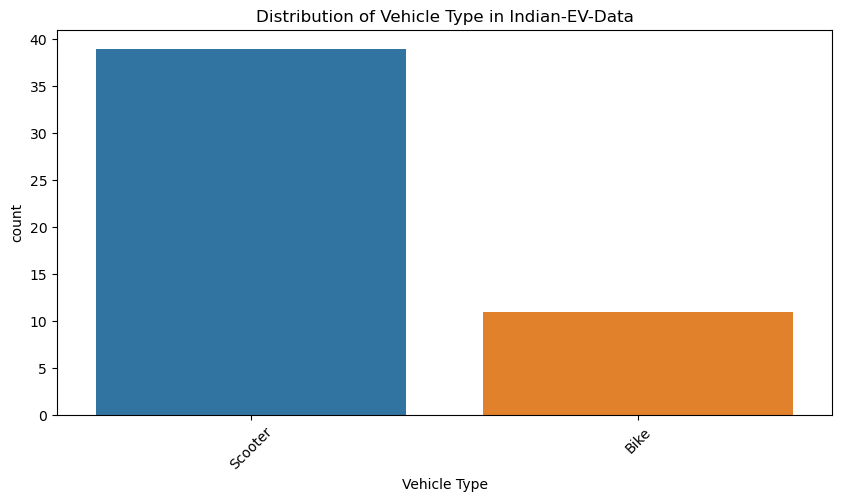

In [31]:
# Categorical features in EV Data dataset
categorical_cols_ev = ev_df.select_dtypes(include=['object']).columns

for col in categorical_cols_ev:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=ev_df, x=col, order=ev_df[col].value_counts().index)
    plt.title(f"Distribution of {col} in Indian-EV-Data")
    plt.xticks(rotation=45)
    plt.show()

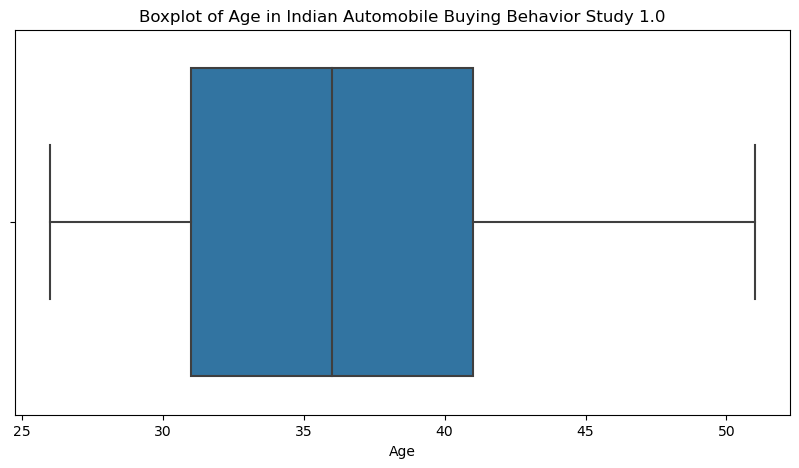

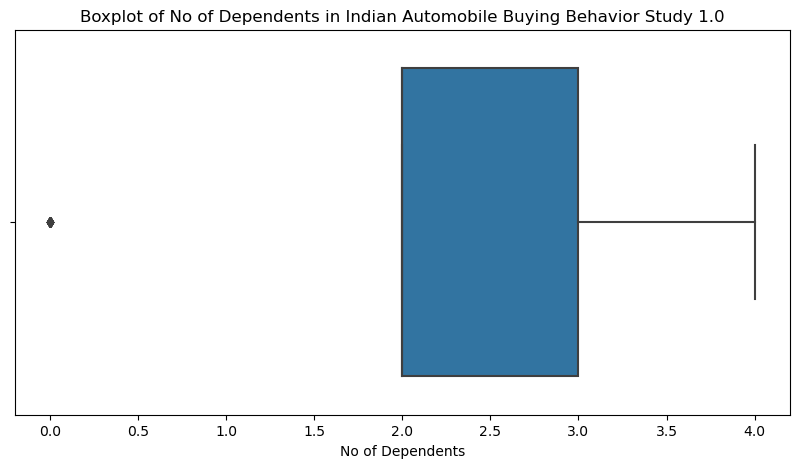

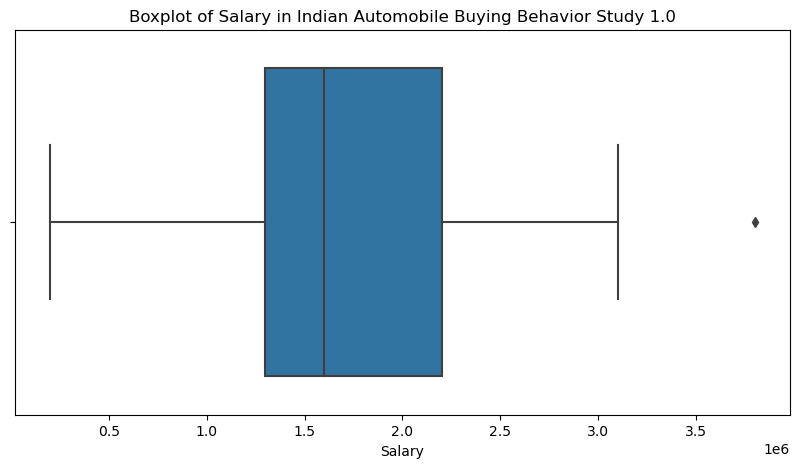

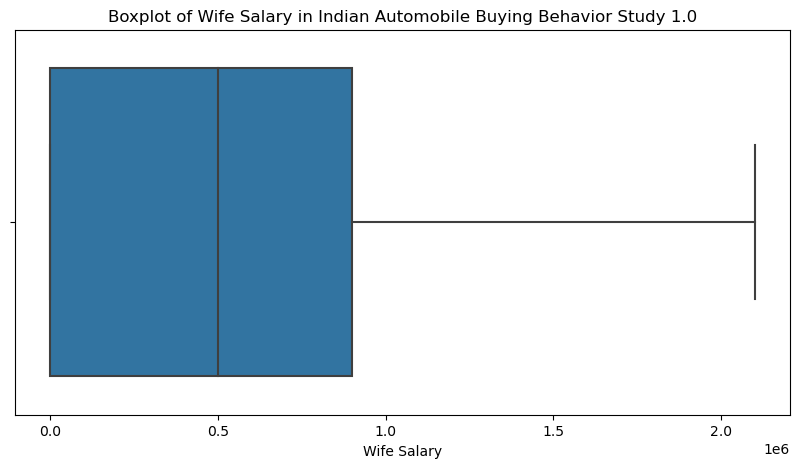

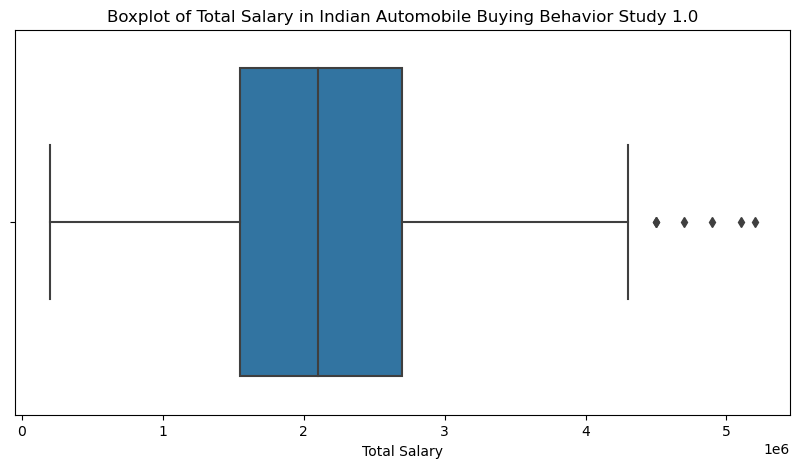

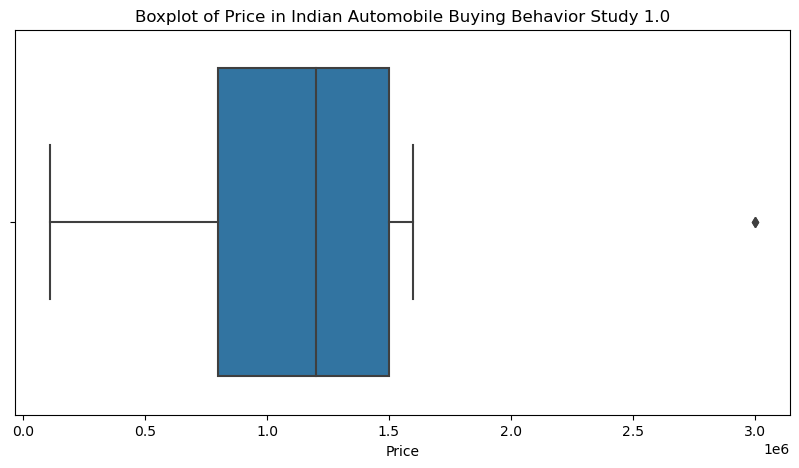

In [33]:
# Outlier detection in Automobile Buying Behavior dataset
for col in automobile_df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=automobile_df[col])
    plt.title(f"Boxplot of {col} in Indian Automobile Buying Behavior Study 1.0")
    plt.show()




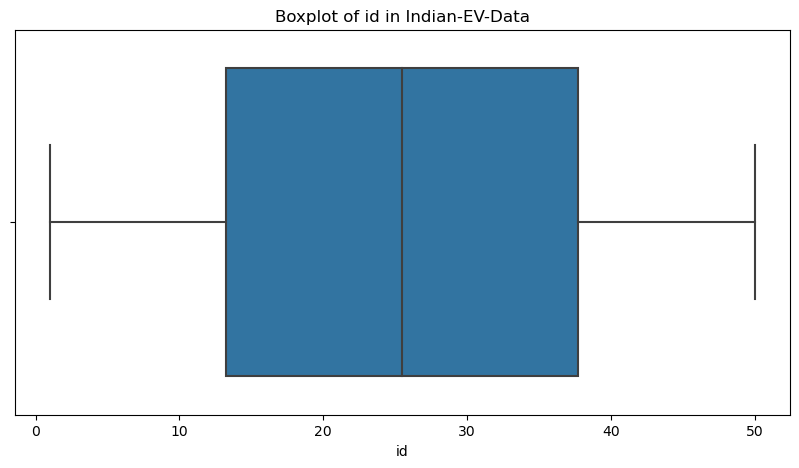

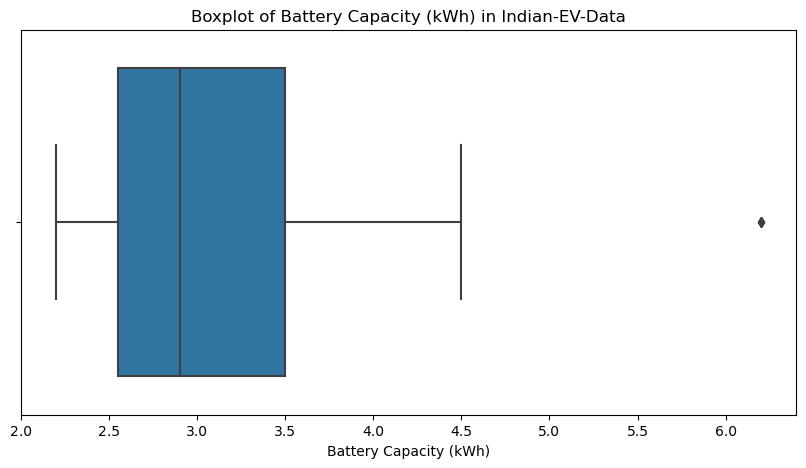

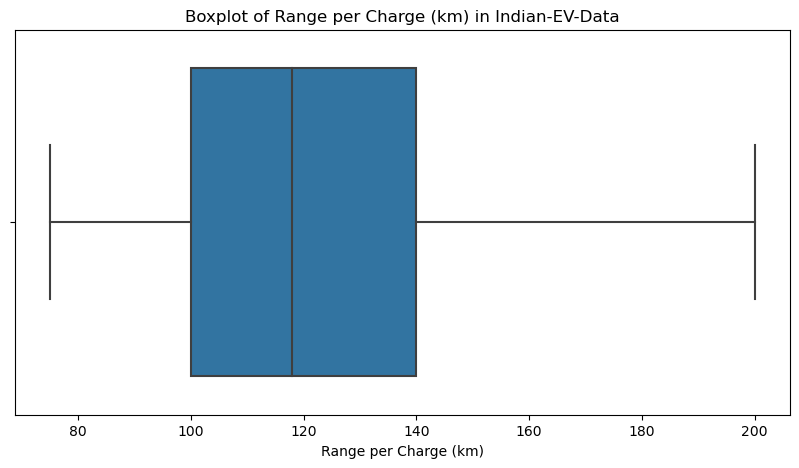

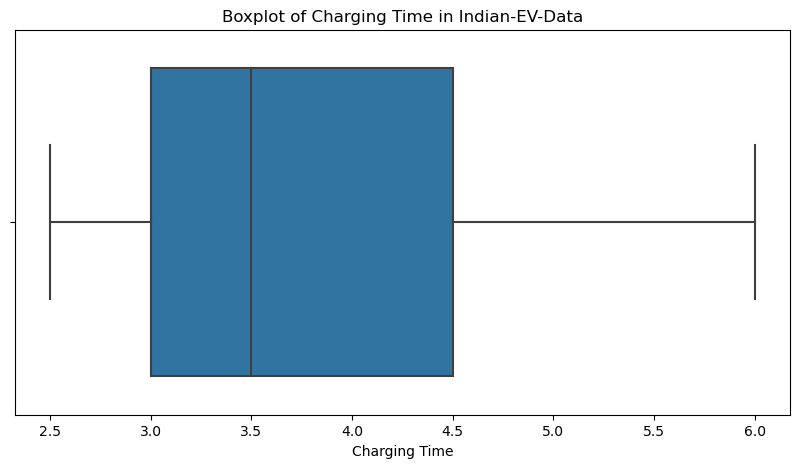

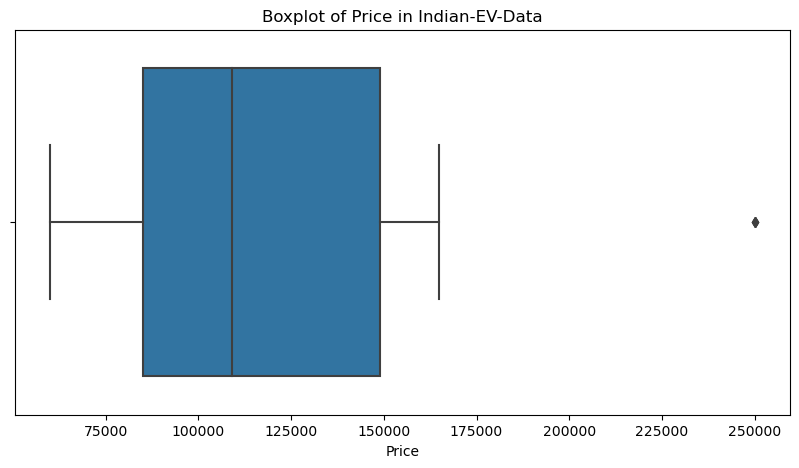

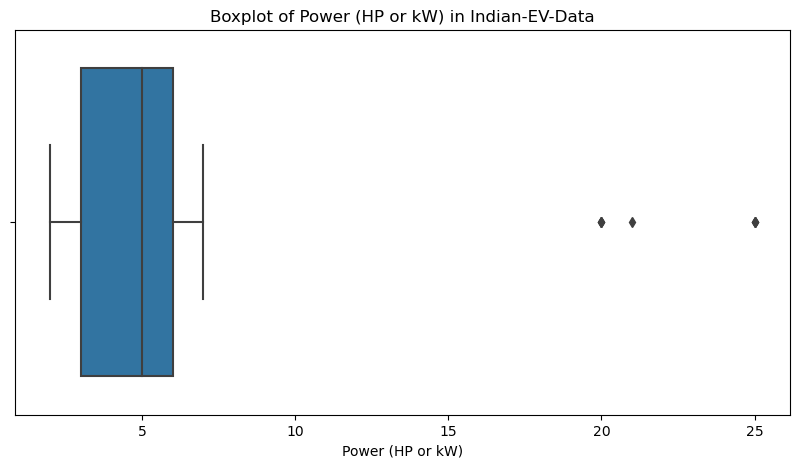

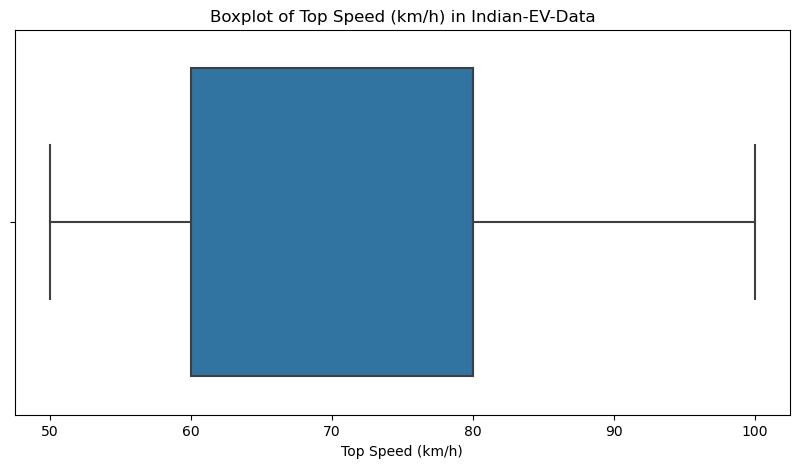

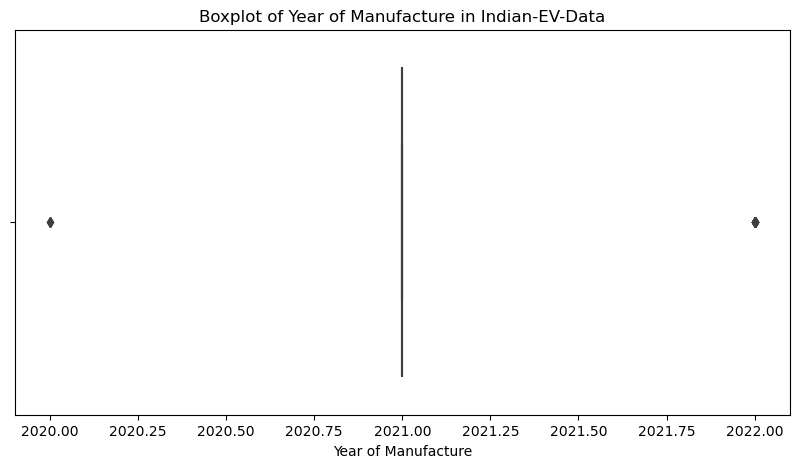

In [34]:
# Outlier detection in EV Data dataset
for col in ev_df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=ev_df[col])
    plt.title(f"Boxplot of {col} in Indian-EV-Data")
    plt.show()

C:\Users\nayak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


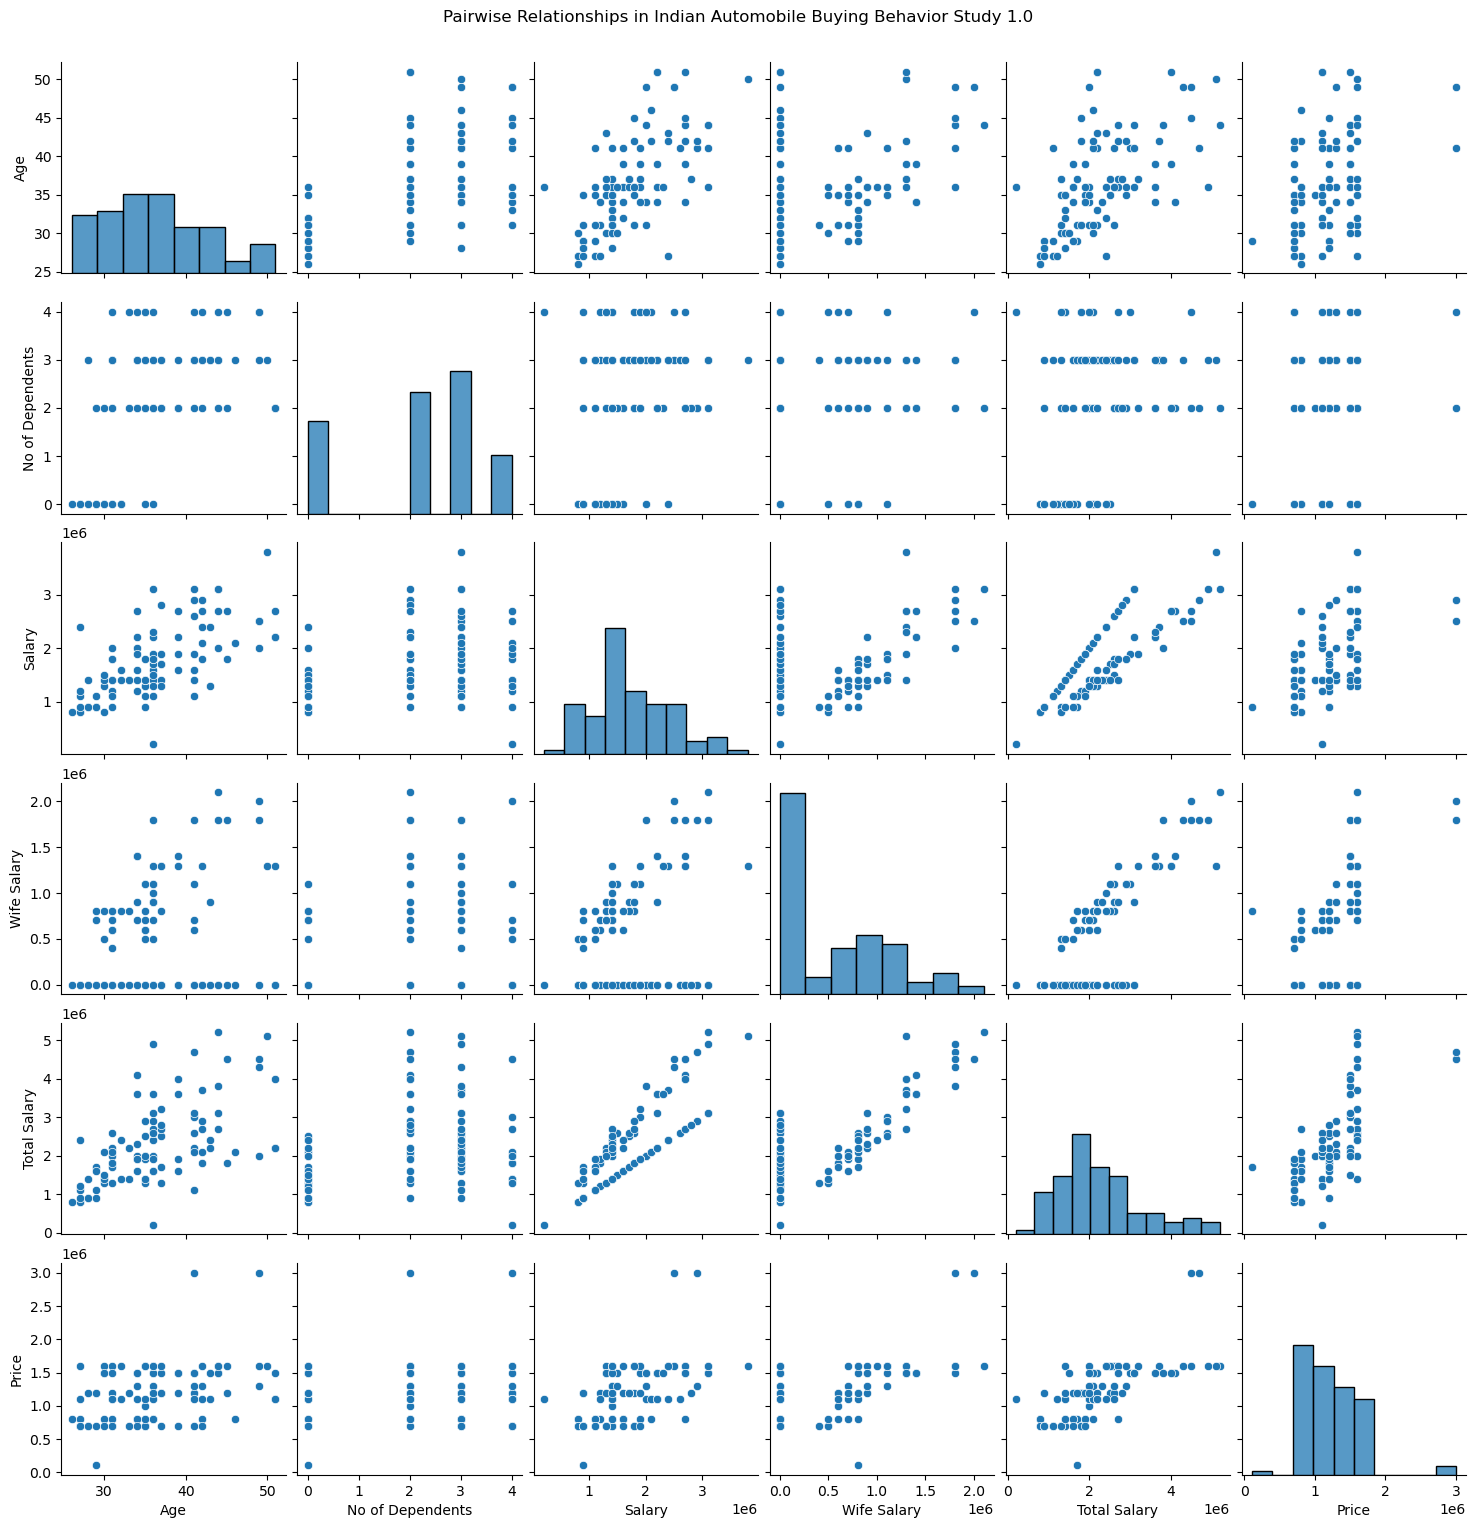

C:\Users\nayak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


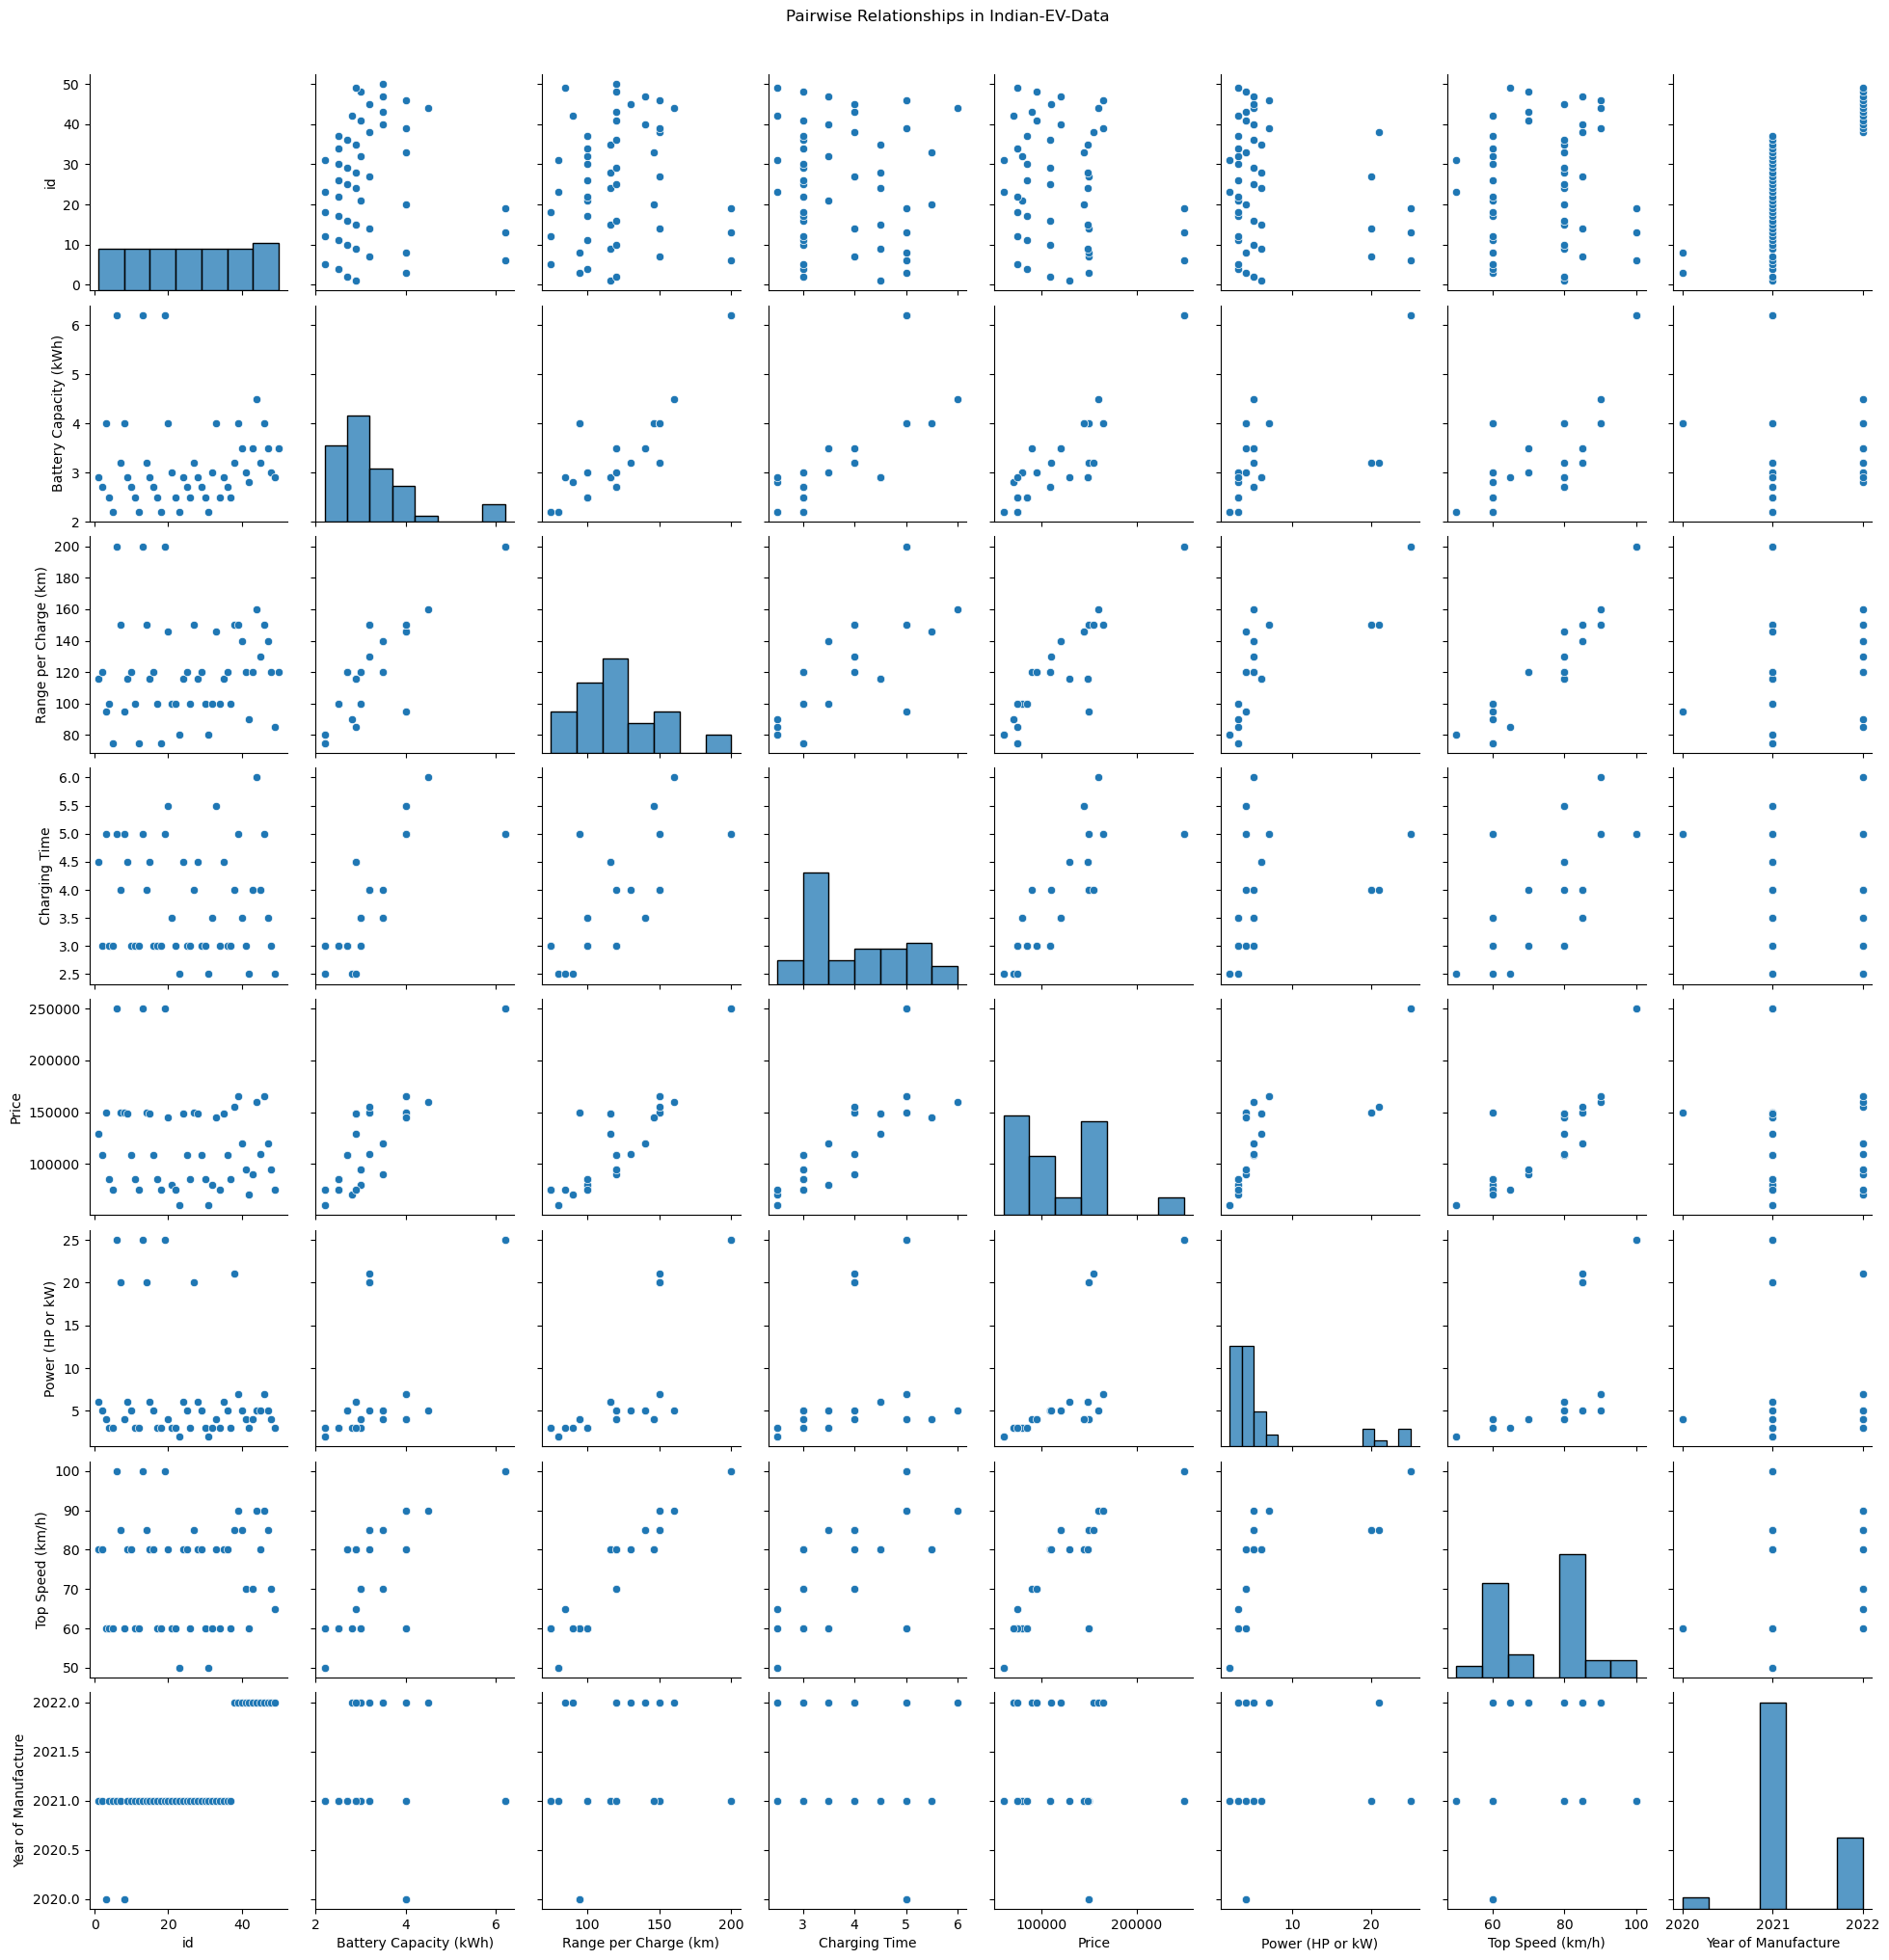

In [35]:
# Pairplot for Automobile Buying Behavior dataset
sns.pairplot(automobile_df)
plt.suptitle("Pairwise Relationships in Indian Automobile Buying Behavior Study 1.0", y=1.02)
plt.show()

# Pairplot for EV Data dataset
sns.pairplot(ev_df)
plt.suptitle("Pairwise Relationships in Indian-EV-Data", y=1.02)
plt.show()


MODEL USING K-MEANS CLUSTERING

In [53]:
# Drop non-numeric columns if necessary
ev_df_numeric = ev_df.select_dtypes(include=[np.number])

# Handle missing values (e.g., fill with mean or drop)
ev_df_numeric.fillna(ev_df_numeric.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
ev_df_scaled = scaler.fit_transform(ev_df_numeric)


C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

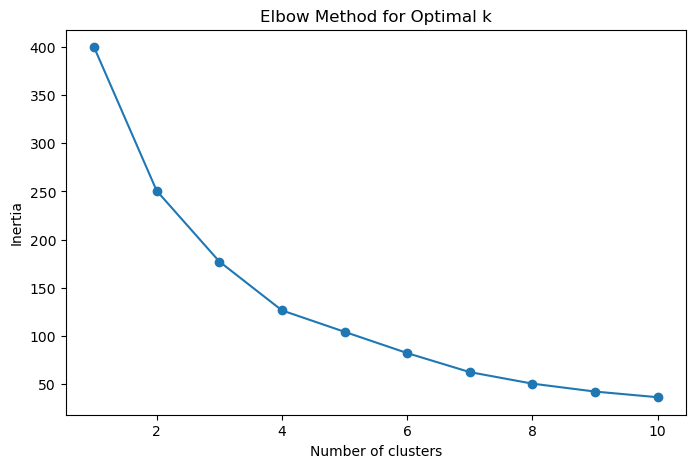

In [55]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ev_df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

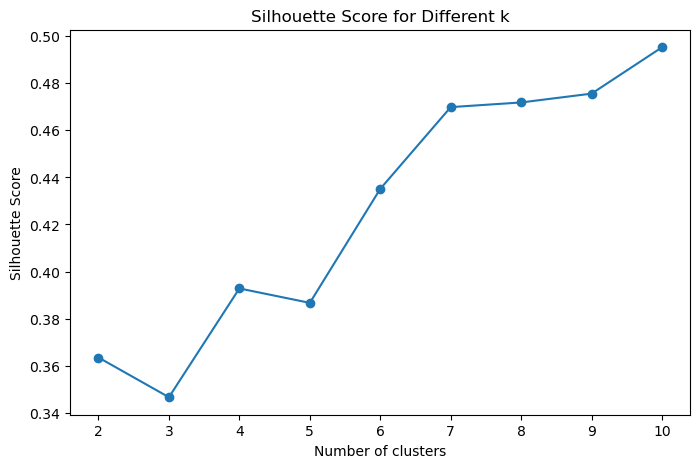

In [57]:
# Compute silhouette scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(ev_df_scaled)
    silhouette_avg = silhouette_score(ev_df_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [58]:
# Fit K-Means clustering
optimal_k_auto = 3  # Adjust based on the analysis
kmeans_auto = KMeans(n_clusters=optimal_k_auto, random_state=42)
clusters_auto = kmeans_auto.fit_predict(ev_df_scaled)

# Add cluster labels to the original dataframe
ev_df['Cluster'] = clusters_auto

# Display the first few rows with cluster labels
print(ev_df.head())


   id                  Model      Manufacturer Vehicle Type  \
0   1          Aura 300 Plus      Ather Energy      Scooter   
1   2      Pure EV Epluto 7G           Pure EV      Scooter   
2   3  Bajaj Chetak Electric        Bajaj Auto      Scooter   
3   4    Okinawa iPraise Pro  Okinawa Autotech      Scooter   
4   5  Hero Electric Opto EV     Hero Motocorp      Scooter   

   Battery Capacity (kWh)  Range per Charge (km)  Charging Time     Price  \
0                     2.9                    116            4.5  129000.0   
1                     2.7                    120            3.0  109000.0   
2                     4.0                     95            5.0  150000.0   
3                     2.5                    100            3.0   85000.0   
4                     2.2                     75            3.0   75000.0   

   Power (HP or kW)  Top Speed (km/h)  Year of Manufacture  Cluster  
0               6.0              80.0               2021.0        1  
1               5.

C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
# Get the cluster centers
centers_auto = kmeans_auto.cluster_centers_

# Transform the centers back to original scale
centers_auto_original = scaler.inverse_transform(centers_auto)
print("Cluster Centers (Automobile Data):")
print(centers_auto_original)


Cluster Centers (Automobile Data):
[[3.30000000e+01 3.38095238e+00 1.34380952e+02 4.29786200e+00
  1.37165209e+05 8.18075802e+00 8.11321672e+01 2.02148591e+03]
 [2.09230769e+01 2.68461538e+00 9.94615385e+01 3.17307692e+00
  9.20384615e+04 3.57692308e+00 6.48076923e+01 2.02100000e+03]
 [1.26666667e+01 6.20000000e+00 2.00000000e+02 5.00000000e+00
  2.50000000e+05 2.50000000e+01 1.00000000e+02 2.02100000e+03]]


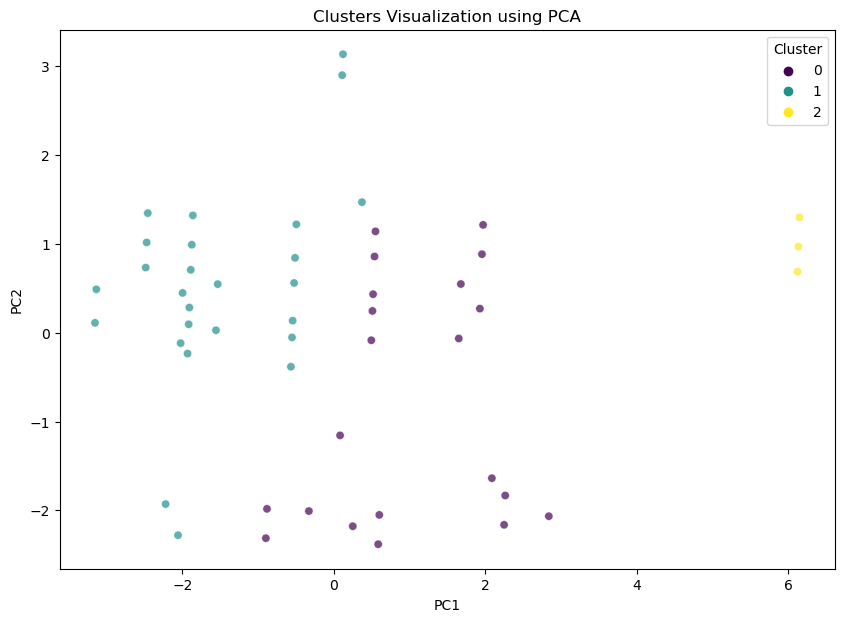

In [60]:
# Reduce dimensionality to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
ev_df_pca = pca.fit_transform(ev_df_scaled)

# Create a DataFrame for PCA results
ev_df_pca = pd.DataFrame(ev_df_pca, columns=['PC1', 'PC2'])
ev_df_pca['Cluster'] = clusters_auto

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=ev_df_pca, palette='viridis', alpha=0.7)
plt.title('Clusters Visualization using PCA')
plt.show()
